# Stacked Bar Charts

In [11]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import numpy as np
from matplotlib import rc
%matplotlib inline


## Data wrangling: 


In [12]:
# importing the data set with FECHA_PAGO as index, parse_date means we are using pandas' datetime function, datefirst adjusts for European date format
df = pd.read_csv('auto_debt.csv', sep=',', encoding='utf-8', index_col='FECHA_PAGO', parse_dates=True, dayfirst=True)
# put the dates in order
df = df.sort_values('FECHA_PAGO')
# add a new column called "Period" with the year-month format
df['Period'] = df.index.to_period(freq='M')
# We only want origen (PAO)
origen_df = df.groupby('MCC_TIPO_ORIGEN')
pao_df = origen_df.get_group('PAO')
# We only want tipo C (credito)
pao_tipo = pao_df.groupby('MCC_TIPO_MOVIMIENTO')
clean_df = pao_tipo.get_group('C')


## Create a new data frame of payments seperated by cuotas

In [13]:
indexed = clean_df.set_index('Period')
cuota_group2 = indexed.groupby('OBN_CUOTA')

In [14]:
def df_special(self_one,self_two,self_three,self_four,self_five,self_six):
    """This function takes six numbers (the data frame numbers) and turns them into a new data frame with information about those cuotas."""
    global zero_df
    global ten_df
    global twenty_df
    global fifty_df
    global fifty_one_df
    global ninety_df
    cuotas = [self_one,self_two,self_three,self_four,self_five,self_six]
    for i in cuotas:
        x = cuota_group2.get_group(i)
        name = str(i)      
        name = 'Cuota_'+name[:-2]
        x.rename(index=str, columns={"MCC_IMPORTE":name}, inplace=True)        
        x_series = x.groupby('Period').sum()
        x_series = x_series.iloc[:,:1]
        if i == 0.0:
            zero_df = pd.DataFrame(x_series)
        if i == 10.0:
            ten_df = pd.DataFrame(x_series)
        if i == 20.0:
            twenty_df = pd.DataFrame(x_series)
        if i == 50.0:
            fifty_df = pd.DataFrame(x_series)
        if i == 51.0:
            fifty_one_df = pd.DataFrame(x_series)
        if i == 90.0:
            ninety_df = pd.DataFrame(x_series)
    merge_three(zero_df,ten_df,twenty_df,fifty_df,fifty_one_df,ninety_df) 

In [15]:
def merge_three(self,self_uno,self_dos,self_tres,self_cuatro,self_cinco):
    global merged
    global merged_1
    global merged_2
    global merged_3
    global merged_total
    global new_df
    merged = pd.merge(self,self_uno, on='Period', how='outer')
    merged_1 = pd.merge(merged,self_dos, on='Period', how='outer')
    merged_2 = pd.merge(merged_1,self_tres, on='Period', how='outer')
    merged_3 = pd.merge(merged_2,self_cuatro, on='Period', how='outer')
    merged_total = pd.merge(merged_3,self_cinco, on='Period', how='outer')
    new_df = merged_total.sort_index()

In [16]:
df_special(0.0,10.0,20.0,50.0,51.0,90.0)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [65]:
# data frame of sums
new_df.head()

,Cuota_0,Cuota_10,Cuota_20,Cuota_50,Cuota_51,Cuota_90
Period,,,,,,
2014-01,861.00,2161.22,232.42,NaN,NaN,NaN
2014-03,55.36,NaN,456.75,NaN,NaN,NaN
2014-04,1193.04,4871.70,NaN,NaN,NaN,NaN
2014-05,18874.97,6645.53,1399.90,NaN,NaN,NaN
2014-06,NaN,NaN,654.80,NaN,NaN,NaN


# Making stacked bar charts of sums 

## first chart: all information (sums by month,  2014-2019)

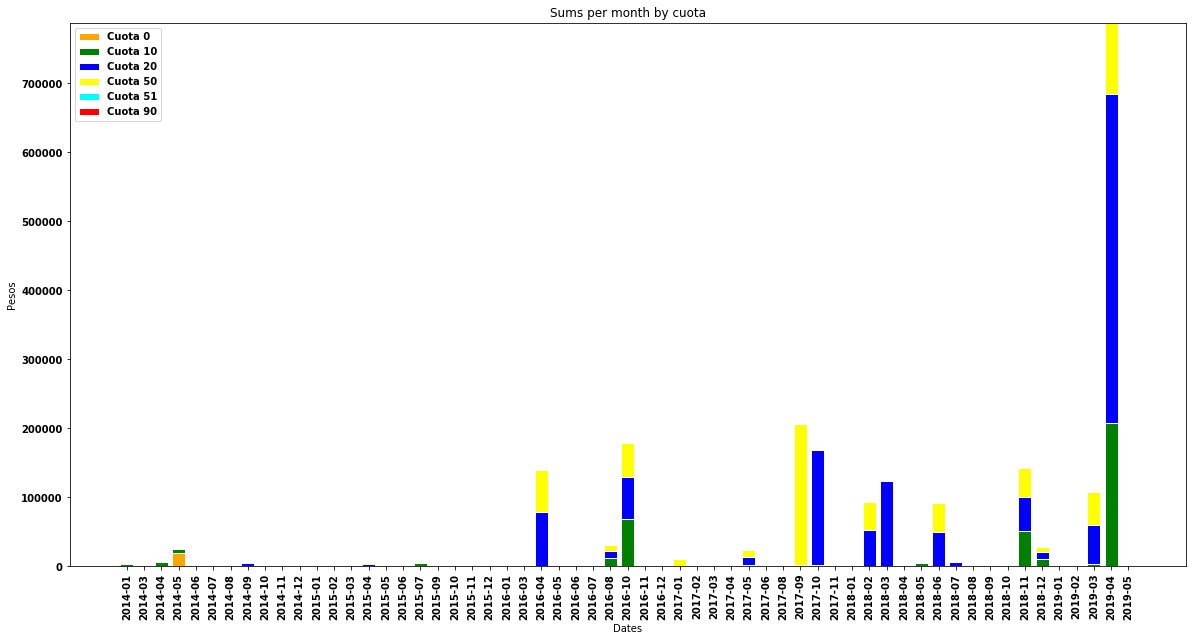

In [26]:
# figure size
plt.rcParams['figure.figsize'] = [20, 10]
# y-axis in bold
rc('font', weight='bold')

# Heights
indx = new_df.index.astype(str)
bar0 = new_df.Cuota_0.fillna(0)
bar10 = new_df.Cuota_10.fillna(0)
bar20 = new_df.Cuota_20.fillna(0)
bar50 = new_df.Cuota_50.fillna(0)
bar51 = new_df.Cuota_51.fillna(0)
bar90 = new_df.Cuota_90.fillna(0) 
 
# Names of group and bar width
names = indx
barWidth = 0.75
 
# Create red bars
p1 = plt.bar(indx, bar0, color='orange', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
p2 = plt.bar(indx, bar10, bottom=bar0, color='green', edgecolor='white', width=barWidth)
# Create blue bars (middle)
p3 = plt.bar(indx, bar20, bottom=bar10+bar0, color='blue', edgecolor='white', width=barWidth)
# Create yellow bars (middle)
p4 = plt.bar(indx, bar50, bottom=bar20+bar10+bar0, color='yellow', edgecolor='white', width=barWidth)
# Create cyan bars (middle)
p5 = plt.bar(indx, bar51, bottom=bar50+bar20+bar10+bar0, color='cyan', edgecolor='white', width=barWidth)
# Create cyan bars (top)
p6 = plt.bar(indx, bar90, bottom=bar51+bar50+bar20+bar10+bar0, color='red', edgecolor='white', width=barWidth)

plt.ylabel('Pesos')
plt.title('Sums per month by cuota')
# Custom X axis
plt.xlabel('Dates')
plt.ylabel('Pesos')
plt.xticks(indx, rotation=90)
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('Cuota 0', 'Cuota 10', 'Cuota 20', 'Cuota 50', 'Cuota 51', 'Cuota 90'))
# Show graphic
plt.show()

# SUMS 2016

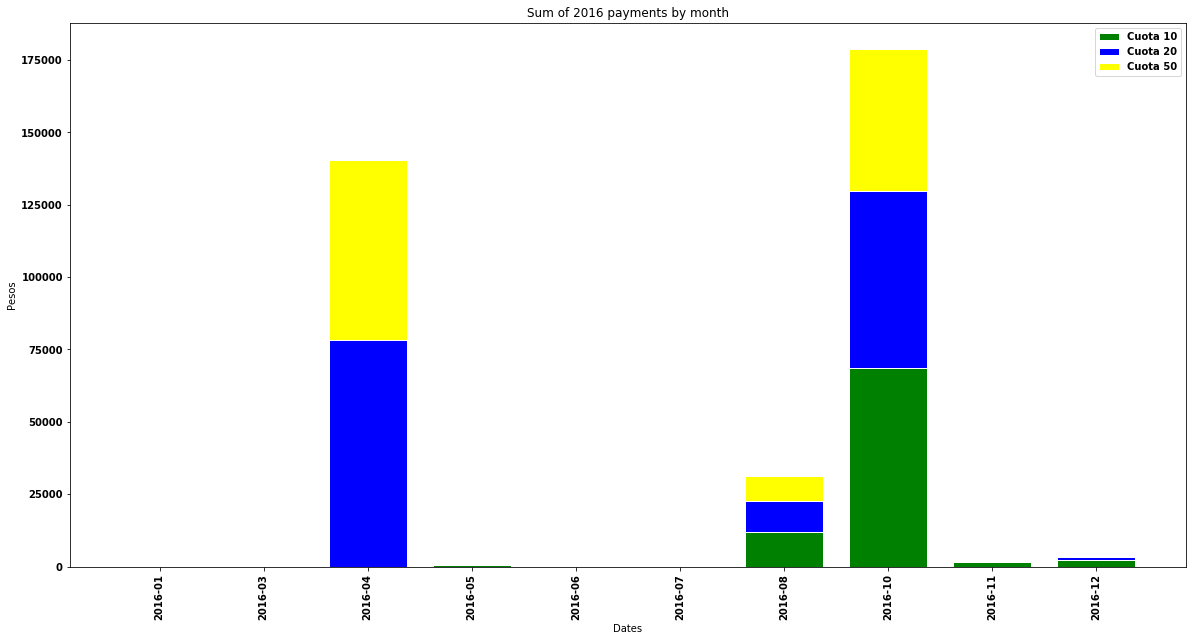

In [28]:
# Stacked bar chart for 2016
plt.rcParams['figure.figsize'] = [20,10]
# y-axis in bol
rc('font', weight='bold')

df_2016 = new_df['2016-01':'2016-12']
# heights
indx = df_2016.index.astype(str)
bar10 = df_2016.Cuota_10.fillna(0)
bar20 = df_2016.Cuota_20.fillna(0)
bar50 = df_2016.Cuota_50.fillna(0) 

# Names of group and bar width
names = indx
barWidth = 0.75
 
# Create green bars bottom
p1 = plt.bar(indx, bar10, color='green', edgecolor='white', width=barWidth)
# Create blue bars (middle), on top of the firs ones
p2 = plt.bar(indx, bar20, bottom=bar10, color='blue', edgecolor='white', width=barWidth)
# Create yellow bars (top)
p3 = plt.bar(indx, bar50, bottom=bar20+bar10, color='yellow', edgecolor='white', width=barWidth)

# label axes
plt.ylabel('Pesos')
plt.xlabel('Dates')
plt.title('Sum of 2016 payments by month')
# rotate X axis label
plt.xticks(indx, rotation=90)
plt.legend((p1[0], p2[0], p3[0]), ('Cuota 10', 'Cuota 20', 'Cuota 50'))
# Show graphic
plt.show()

# SUMS 2017

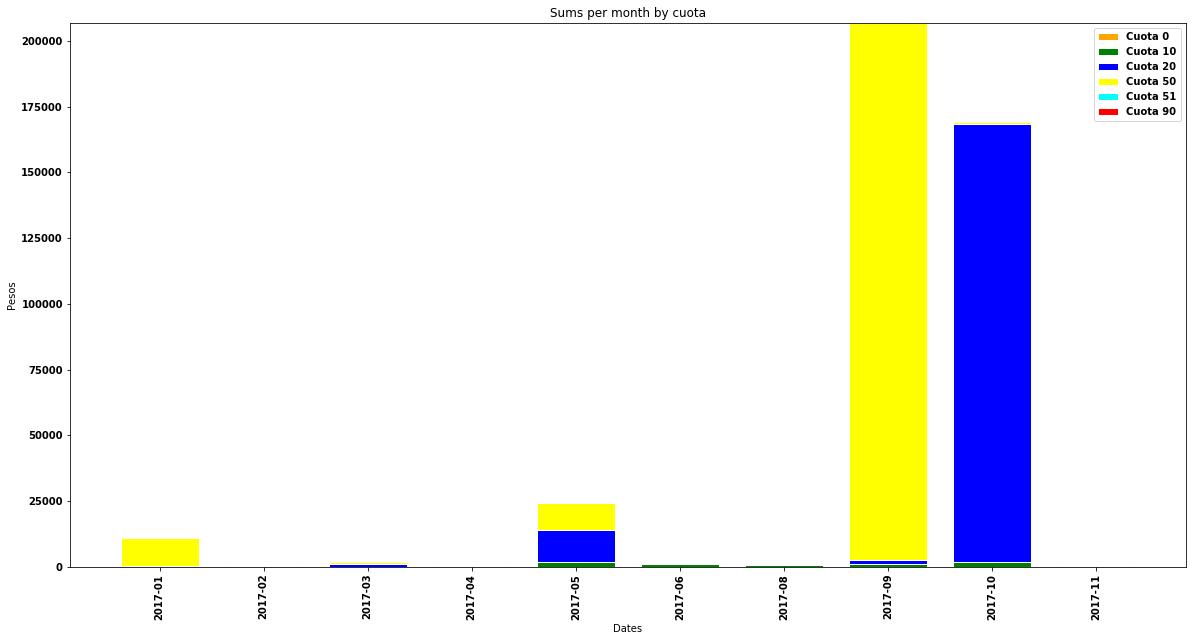

In [29]:
# figure size
plt.rcParams['figure.figsize'] = [20, 10]
# y-axis in bold
rc('font', weight='bold')

df_2017 = new_df['2017-01':'2017-12']

# Heights
indx = df_2017.index.astype(str)
bar0 = df_2017.Cuota_0.fillna(0)
bar10 = df_2017.Cuota_10.fillna(0)
bar20 = df_2017.Cuota_20.fillna(0)
bar50 = df_2017.Cuota_50.fillna(0)
bar51 = df_2017.Cuota_51.fillna(0)
bar90 = df_2017.Cuota_90.fillna(0) 
 
# Names of group and bar width
names = indx
barWidth = 0.75
 
# Create red bars
p1 = plt.bar(indx, bar0, color='orange', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
p2 = plt.bar(indx, bar10, bottom=bar0, color='green', edgecolor='white', width=barWidth)
# Create blue bars (middle)
p3 = plt.bar(indx, bar20, bottom=bar10+bar0, color='blue', edgecolor='white', width=barWidth)
# Create yellow bars (middle)
p4 = plt.bar(indx, bar50, bottom=bar20+bar10+bar0, color='yellow', edgecolor='white', width=barWidth)
# Create cyan bars (middle)
p5 = plt.bar(indx, bar51, bottom=bar50+bar20+bar10+bar0, color='cyan', edgecolor='white', width=barWidth)
# Create cyan bars (top)
p6 = plt.bar(indx, bar90, bottom=bar51+bar50+bar20+bar10+bar0, color='red', edgecolor='white', width=barWidth)

plt.ylabel('Pesos')
plt.title('Sums per month by cuota')
# Custom X axis
plt.xlabel('Dates')
plt.ylabel('Pesos')
plt.xticks(indx, rotation=90)
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('Cuota 0', 'Cuota 10', 'Cuota 20', 'Cuota 50', 'Cuota 51', 'Cuota 90'))
# Show graphic
plt.show()

# SUMS 2018

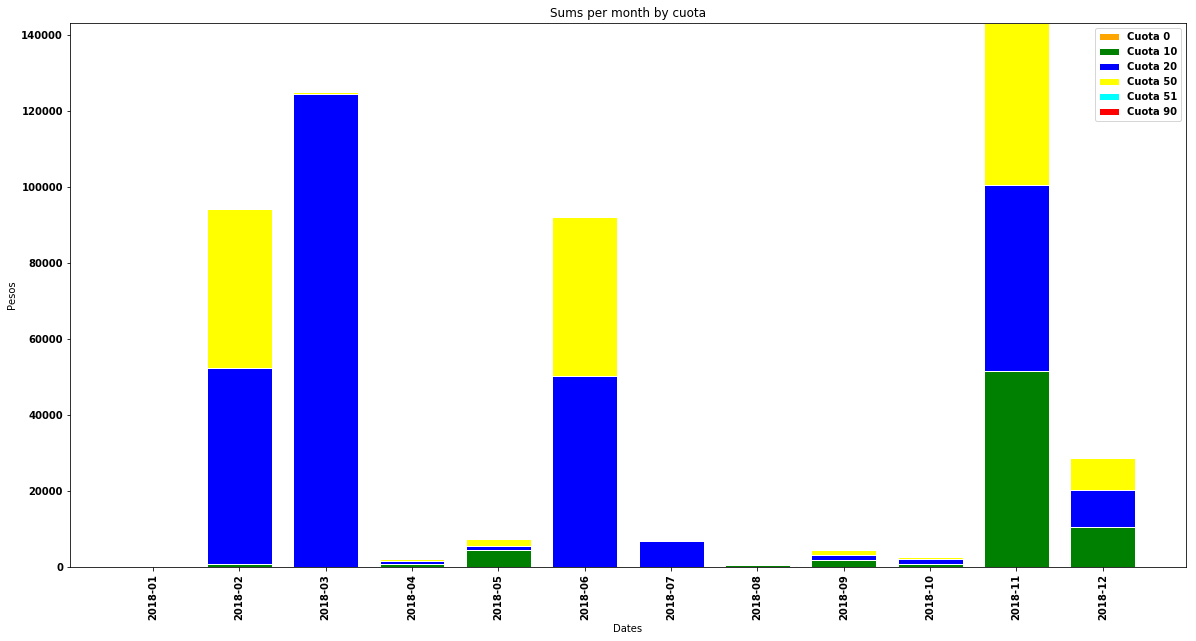

In [30]:
# figure size
plt.rcParams['figure.figsize'] = [20, 10]
# y-axis in bold
rc('font', weight='bold')

df_2018 = new_df['2018-01':'2018-12']

# Heights
indx = df_2018.index.astype(str)
bar0 = df_2018.Cuota_0.fillna(0)
bar10 = df_2018.Cuota_10.fillna(0)
bar20 = df_2018.Cuota_20.fillna(0)
bar50 = df_2018.Cuota_50.fillna(0)
bar51 = df_2018.Cuota_51.fillna(0)
bar90 = df_2018.Cuota_90.fillna(0) 
 
# Names of group and bar width
names = indx
barWidth = 0.75
 
# Create red bars
p1 = plt.bar(indx, bar0, color='orange', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
p2 = plt.bar(indx, bar10, bottom=bar0, color='green', edgecolor='white', width=barWidth)
# Create blue bars (middle)
p3 = plt.bar(indx, bar20, bottom=bar10+bar0, color='blue', edgecolor='white', width=barWidth)
# Create yellow bars (middle)
p4 = plt.bar(indx, bar50, bottom=bar20+bar10+bar0, color='yellow', edgecolor='white', width=barWidth)
# Create cyan bars (middle)
p5 = plt.bar(indx, bar51, bottom=bar50+bar20+bar10+bar0, color='cyan', edgecolor='white', width=barWidth)
# Create cyan bars (top)
p6 = plt.bar(indx, bar90, bottom=bar51+bar50+bar20+bar10+bar0, color='red', edgecolor='white', width=barWidth)

plt.ylabel('Pesos')
plt.title('Sums per month by cuota')
# Custom X axis
plt.xlabel('Dates')
plt.ylabel('Pesos')
plt.xticks(indx, rotation=90)
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('Cuota 0', 'Cuota 10', 'Cuota 20', 'Cuota 50', 'Cuota 51', 'Cuota 90'))
# Show graphic
plt.show()

# SUMS 2019

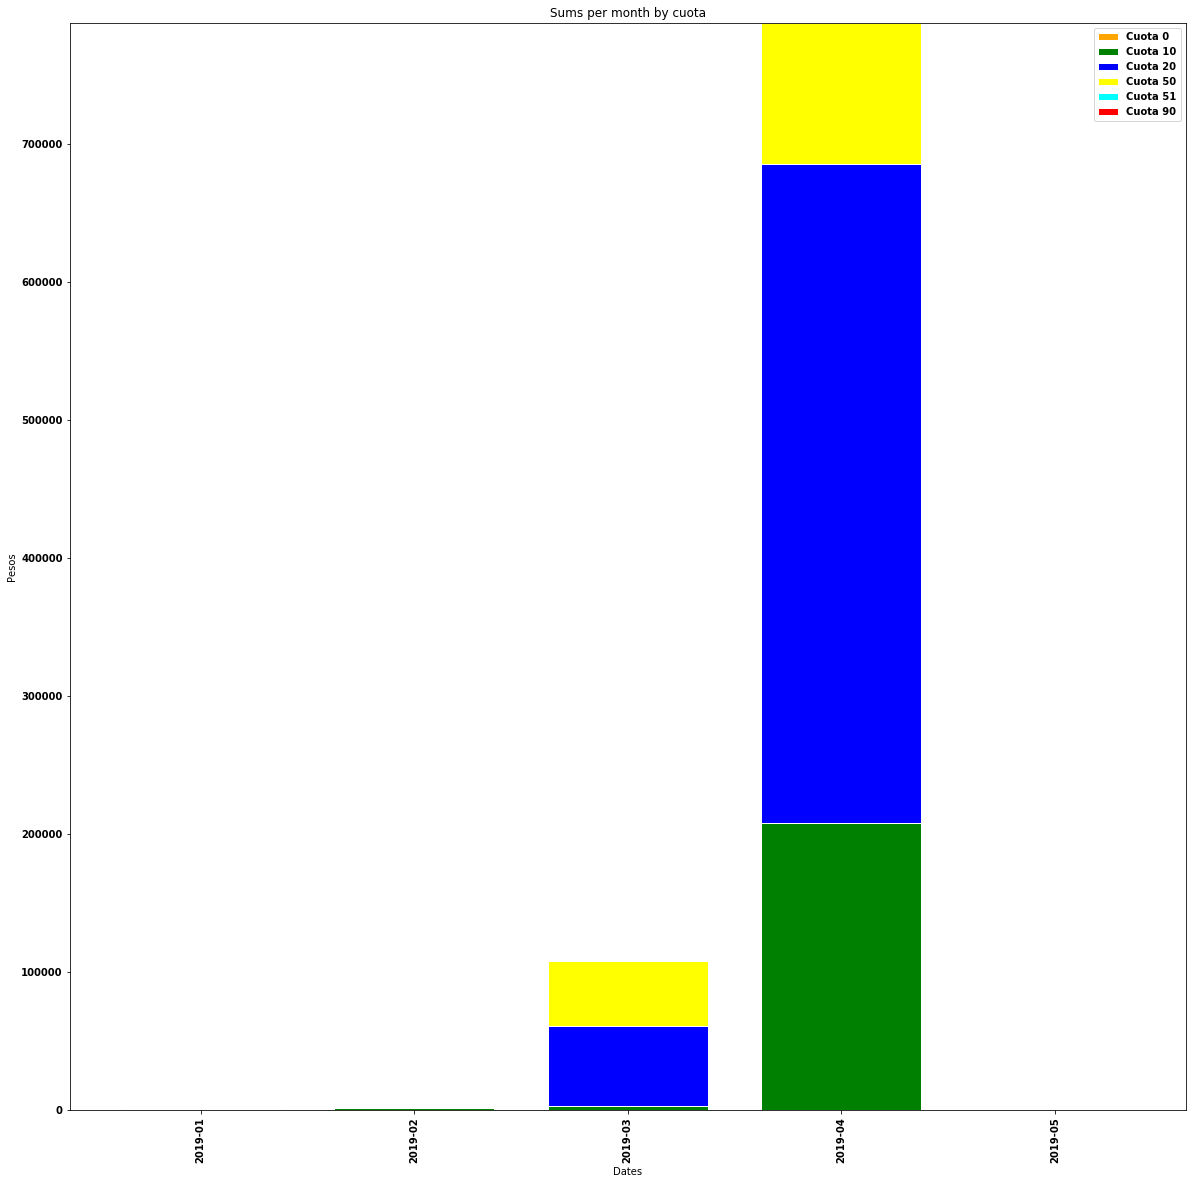

In [72]:
# figure size
plt.rcParams['figure.figsize'] = [20, 20]
# y-axis in bold
rc('font', weight='bold')

df_2019 = new_df['2019-01':'2019-5']

# Heights
indx = df_2019.index.astype(str)
bar0 = df_2019.Cuota_0.fillna(0)
bar10 = df_2019.Cuota_10.fillna(0)
bar20 = df_2019.Cuota_20.fillna(0)
bar50 = df_2019.Cuota_50.fillna(0)
bar51 = df_2019.Cuota_51.fillna(0)
bar90 = df_2019.Cuota_90.fillna(0) 
 
# Names of group and bar width
names = indx
barWidth = 0.75
 
# Create red bars
p1 = plt.bar(indx, bar0, color='orange', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
p2 = plt.bar(indx, bar10, bottom=bar0, color='green', edgecolor='white', width=barWidth)
# Create blue bars (middle)
p3 = plt.bar(indx, bar20, bottom=bar10+bar0, color='blue', edgecolor='white', width=barWidth)
# Create yellow bars (middle)
p4 = plt.bar(indx, bar50, bottom=bar20+bar10+bar0, color='yellow', edgecolor='white', width=barWidth)
# Create cyan bars (middle)
p5 = plt.bar(indx, bar51, bottom=bar50+bar20+bar10+bar0, color='cyan', edgecolor='white', width=barWidth)
# Create cyan bars (top)
p6 = plt.bar(indx, bar90, bottom=bar51+bar50+bar20+bar10+bar0, color='red', edgecolor='white', width=barWidth)

plt.ylabel('Pesos')
plt.title('Sums per month by cuota')
# Custom X axis
plt.xlabel('Dates')
plt.ylabel('Pesos')
plt.xticks(indx, rotation=90)
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('Cuota 0', 'Cuota 10', 'Cuota 20', 'Cuota 50', 'Cuota 51', 'Cuota 90'))
# Show graphic
plt.show()

In [64]:
# Why are so many of the payments repeated twice, same day, same amount? 
clean_df['2019-03':'2019-5'].iloc[:,:3]

,MCC_OBN_ID,MCC_TIPO_MOVIMIENTO,MCC_IMPORTE
FECHA_PAGO,,,
2019-03-14,20130000000013200720,C,226.62
2019-03-14,20130000000013200720,C,226.62
2019-03-14,20130000000013200720,C,44.46
2019-03-14,20130000000013200720,C,44.46
2019-03-14,20130000000013200720,C,52.99
2019-03-14,20130000000013200720,C,52.99
2019-03-14,20130000000013200720,C,371.42
2019-03-14,20130000000013200720,C,371.42
2019-03-20,20130000000013282223,C,21.64


In [67]:
# there were 508 payments made in April, 2019...?
clean_df.MCC_IMPORTE['2019-4'].count()

508

In [69]:
# the average amount of the payment was $1,550
clean_df.MCC_IMPORTE['2019-4'].mean()

1550.8137401574802

In [68]:
# compare that to 2016 (the previous outlier we looked at), when only 8 payments were made...
clean_df.MCC_IMPORTE['2016-4'].count()

8

In [70]:
# ... with and average of $17,546 pesos
clean_df.MCC_IMPORTE['2016-4'].mean()

17546.899999999998